In [15]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.spatial
plt.rcParams.update({'font.size': 18})
import matplotlib

In [44]:
filepath = 'plots/version5/ssc/sscanalysis.csv'
resultsDF = pd.read_csv(filepath).set_index('City')
resultsDF = resultsDF[resultsDF['DM']>0]
paired_df = pd.read_csv('USpairs2005-2015.csv').set_index('City')
resultsDF['Dry'] = resultsDF[['DM', 'DP', 'DT']].mean(axis=1)
resultsDF['Wet'] = resultsDF[['MM', 'MP', 'MT', 'MTP']].mean(axis=1)

In [37]:
resultsDF.head()

,DM,DP,DT,MM,MP,MT,MTP,Dry,Wet
City,,,,,,,,,
Hartford,3.814124,3.222642,4.167857,3.082160,2.232558,3.616085,2.579091,3.734874,2.877473
Providence,0.359281,0.420000,0.287671,0.842342,1.252632,0.467376,0.832967,0.355651,0.848829
West Palm Beach,1.593333,NaN,NaN,0.896203,NaN,1.346834,1.442939,1.593333,1.228659
Louisville,2.278589,1.709524,3.434043,2.247034,1.884615,2.681114,2.981818,2.474052,2.448645
Charlotte,0.645982,1.766667,-0.285841,-0.094798,0.141667,-0.014286,-0.756471,0.708936,-0.180972


In [21]:
resultsDF['Dry'] = resultsDF[['DM', 'DP', 'DT']].mean(axis=1)

In [32]:
good_cities = paired_df[paired_df['Urban distance']<.15].index

('Mean Difference is: ', 0.8454670458203787)


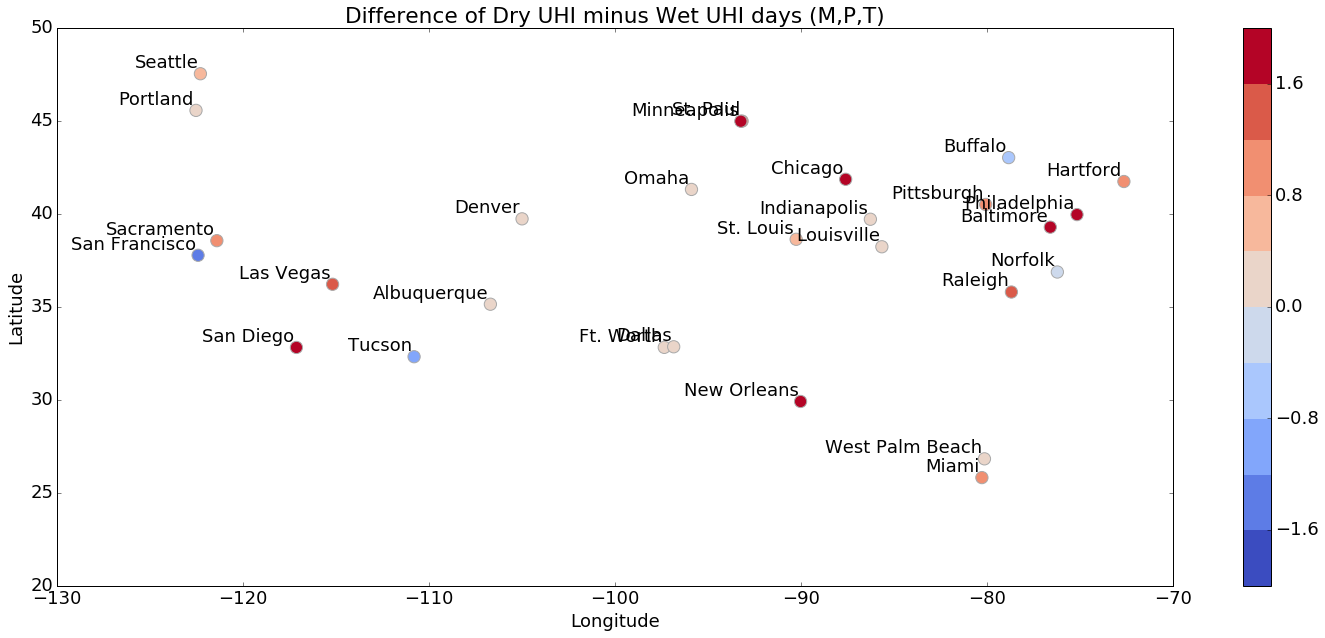

In [45]:
fig = plt.figure(figsize=[25,10])
data = (resultsDF['Dry'] - resultsDF['Wet']).loc[good_cities]#).loc[good_index]#.drop(['Washington, D.C.', 'Norfolk', 'Raleigh'])
# Set up colors for plotting
cmap = matplotlib.cm.coolwarm
c = data[~np.isnan(data)]
bounds = np.linspace(-2,2,11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
marker_size = 150

# plot data
plotHandle = plt.scatter(paired_df.loc[c.index]['Urban Lon'], paired_df.loc[c.index]['Urban Lat'], 
                        c = c.values, s = marker_size, alpha = 1, 
                        #transform=ccrs.Geodetic(), 
                        edgecolors = 'darkgray', 
                 cmap = cmap,
                 norm = norm, zorder = 1, )
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Difference of Dry UHI minus Wet UHI days (M,P,T)')
for label, x, y in zip(c.index,paired_df.loc[c.index]['Urban Lon'], paired_df.loc[c.index]['Urban Lat']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom',
        bbox=None, #dict(boxstyle=None, fc='None', alpha=0.5),
        arrowprops=None, #dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    )
print('Mean Difference is: ', data.mean())

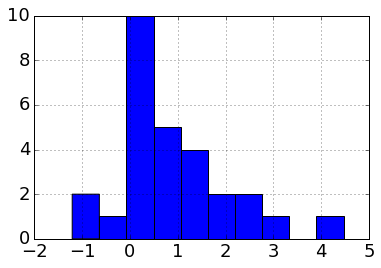

In [46]:
data.hist()